<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Data%20Mining%20Assignment%204/Question%201/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Normalization, Data Portability and Feature Subset Selection

####Data Normalization

First I have tried various data normalization techniques such as Scaling, Z-Score and Feature clipping

Here I have used a cardiovascular dataset. The data set consists of the following :

- id	
- age	
- gender	
- height	
- weight	
- ap_hi	
- ap_lo	
- cholesterol	
- gluc	
- smoke	
- alco	
- active	
- cardio(target)

The target variable is to predict whether or not the patient has a cardio vascular disease.



In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/cardio_train.csv", sep= ";")

In [3]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39983,57160,18234,1,156,55.0,120,80,1,1,0,0,1,1
39984,57161,19803,1,155,76.0,120,80,3,3,0,0,1,1
39985,57162,22696,2,174,81.0,140,80,1,1,0,0,1,1
39986,57163,23519,2,169,68.0,120,80,1,1,0,0,1,1


Scaling

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
 
#data = sns.load_dataset('iris')
print('Original Dataset')
data.drop('id', axis=1, inplace=True)
data.head()
 
# Min-Max Normalization
df = data.drop('cardio', axis=1)
df_norm = (df.ap_hi-df.ap_hi.min())/(df.ap_hi.max()-df.ap_hi.min())
df_norm = pd.concat((df_norm, data.cardio), 1)
 
print("Scaled Dataset Using Pandas")
df.ap_hi = df_norm.ap_hi

Original Dataset
Scaled Dataset Using Pandas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  del sys.path[0]


ap_hi values in the Normalized using scaling

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,0.018349,80,1,1,0,0,1
1,20228,1,156,85.0,0.020466,90,3,1,0,0,1
2,18857,1,165,64.0,0.019760,70,3,1,0,0,0
3,17623,2,169,82.0,0.021171,100,1,1,0,0,1
4,17474,1,156,56.0,0.017643,60,1,1,0,0,0


Standardization(Z-score)

Trying out for all columns

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
 
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/cardio_train.csv", sep= ";")
print('Original Dataset')
data.drop('id', axis=1, inplace=True)
data['age_in_years'] = data['age']//365
data = data.drop(columns=['age'])
data = data.reset_index(drop = True)
#print(df['ap_hi'].unique())
print(df['ap_hi'].max())
print(df['ap_hi'].min())
data.head()

std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','age_in_years'])
print(df_scaled['ap_hi'].max())
print(df_scaled['ap_hi'].min())
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Original Dataset
1.0
0.0
8.761500882207374
-4.403538830299618
Scaled Dataset Using StandardScaler


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years
0,-0.430856,1.36696,0.439349,-0.851068,-0.154614,-0.086455,-0.535392,-0.393957,-0.312854,-0.238255,0.496301
1,0.310348,-0.73155,-1.021532,0.751027,0.103122,-0.035934,2.418015,-0.393957,-0.312854,-0.238255,0.496301
2,-0.243435,-0.73155,0.074128,-0.711755,0.017210,-0.136975,2.418015,-0.393957,-0.312854,-0.238255,-2.014907
3,-0.741880,1.36696,0.561089,0.542058,0.189034,0.014587,-0.535392,-0.393957,-0.312854,-0.238255,0.496301
4,-0.802065,-0.73155,-1.021532,-1.269006,-0.240526,-0.187496,-0.535392,-0.393957,-0.312854,-0.238255,-2.014907


Feature Clipping

Using feature clipping for ap_hi

In [11]:
import numpy as np
  
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/cardio_train.csv", sep= ";")
print('Original Dataset')
data.drop('id', axis=1, inplace=True)
data['age_in_years'] = data['age']//365
data = data.drop(columns=['age'])
data = data.reset_index(drop = True)
#print(df['ap_hi'].unique())
print(data['ap_hi'].max())
print(data['ap_hi'].min())
data.head()
  
data['ap_hi'] = np.clip(data['ap_hi'], a_min = 20, a_max = 250)
print(data['ap_hi'].max())
print(data['ap_hi'].min())

Original Dataset
14020
-150
250
20


####Data Portability

Next I have tried various Data Portability techniques such as Label encoding, One-Hot encoding, Quantile bucketing - equi width, equi depth for the cardio dataset

I have used diabetes dataset(description of this dataset in given at the bottom of this notebook) to encode the outcome feature from string to integer using label encoding method

Label encoding

In [141]:
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%204/Dataset/diabetes%20-%20diabetes.csv")

In [142]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [143]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['Outcome'], dtype='object')


In [144]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [145]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


One-Hot encoding

For One-hot encoding I have used the car price prediction dataset(I have explained this dataset at the bottom of this notebook)
Various features are given from which car price is predicted.

In [157]:
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%204/Dataset/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Fuel Type and Door Number features are ported using one hot encoding technique here

In [158]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
  
# Converting type of columns to category
data['fueltype']=data['fueltype'].astype('category')
data['doornumber']=data['doornumber'].astype('category')
#data['carbody']=data['carbody'].astype('category')
#data['enginelocation']=data['enginelocation'].astype('category')
  
  
#Assigning numerical values and storing it in another columns
data['fueltype_encoded']=data['fueltype'].cat.codes
data['doornumber_encoded']=data['doornumber'].cat.codes 
#data['carbody_encoded']=data['carbody'].cat.codes
#data['doornumber_encoded']=data['doornumber'].cat.codes 
  
  
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
  
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
have huge  number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(data[['fueltype_encoded','doornumber_encoded']]).toarray())
  #'carbody_encoded','doornumber_encoded'
#Merge with main
encoded_df=data.join(enc_data)
  
print(encoded_df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

Quantile bucketing - equi width

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/cardio_train.csv", sep= ";")
data.drop('id', axis=1, inplace=True)
data['age_in_years'] = data['age']//365
data = data.drop(columns=['age'])
data = data.reset_index(drop = True)
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47


In [14]:
#right = True, by default
pd.cut(data.age_in_years, bins=5, right=True).head()

0    (43.0, 50.0]
1    (50.0, 57.0]
2    (50.0, 57.0]
3    (43.0, 50.0]
4    (43.0, 50.0]
Name: age_in_years, dtype: category
Categories (5, interval[float64, right]): [(28.965, 36.0] < (36.0, 43.0] < (43.0, 50.0] <
                                           (50.0, 57.0] < (57.0, 64.0]]

In [15]:
data['age_split'] = pd.cut(data.age_in_years, bins=5,
                      labels=['young', 'young-middle', 'middle', 'middle-old', 'old'])
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,age_split
0,2,168,62.0,110,80,1,1,0,0,1,0,50,middle
1,1,156,85.0,140,90,3,1,0,0,1,1,55,middle-old
2,1,165,64.0,130,70,3,1,0,0,0,1,51,middle-old
3,2,169,82.0,150,100,1,1,0,0,1,1,48,middle
4,1,156,56.0,100,60,1,1,0,0,0,0,47,middle


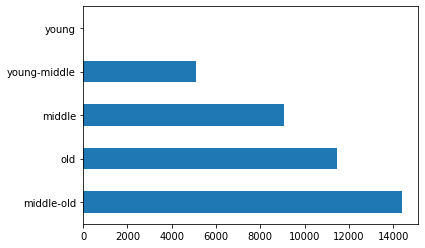

In [16]:
data['age_split'].value_counts().plot(kind='barh')
plt.show()

Quantile bucketing - equi depth 

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/cardio_train.csv", sep= ";")
data.drop('id', axis=1, inplace=True)
data['age_in_years'] = data['age']//365
data = data.drop(columns=['age'])
data = data.reset_index(drop = True)
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47


In [18]:
pd.qcut(data.age_in_years, q=5).head(7)

0    (46.0, 51.0]
1    (51.0, 55.0]
2    (46.0, 51.0]
3    (46.0, 51.0]
4    (46.0, 51.0]
5    (59.0, 64.0]
6    (59.0, 64.0]
Name: age_in_years, dtype: category
Categories (5, interval[float64, right]): [(28.999, 46.0] < (46.0, 51.0] < (51.0, 55.0] <
                                           (55.0, 59.0] < (59.0, 64.0]]

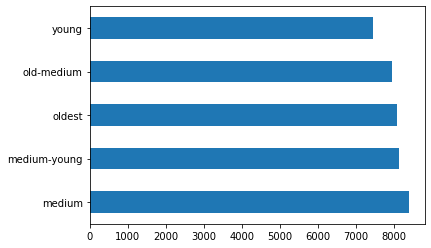

In [19]:
data['age_split'] = pd.qcut(data.age_in_years, q=5,
                        labels=['oldest',
                                'old-medium',
                                'medium',
                                'medium-young',
                                'young'])
data.head()
 
data['age_split'].value_counts().plot(kind='barh')
plt.show()

####Feature Subset Selection

Feature Selection, Forward search and Backward search

Feature Selection using filter method - removing constant values

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The data set predicts a customer as loyal or not loyal based on various factors such as:
- Id	
- gender	
- age	
- status	
- income	
- visitNo	
- method	
- timeSpend	
- location	
- membershipCard	
- itemPurchaseCoffee	
- itempurchaseCold	
- itemPurchasePastries	
- itemPurchaseJuices	
- itemPurchaseSandwiches	
- itemPurchaseOthers	
- spendPurchase	
- productRate	
- priceRate	
- promoRate	
- ambianceRate	
- wifiRate	
- serviceRate	
- chooseRate	
- promoMethodApp	
- promoMethodSoc	
- promoMethodEmail	
- promoMethodDeal	
- promoMethodFriend	
- promoMethodDisplay	
- promoMethodBillboard	
- promoMethodOthers	
- loyal

In [63]:
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%204/Dataset/Starbucks%20satisfactory%20survey%20data.csv")
data.head()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,...,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [64]:
data.shape

(113, 33)

In [65]:
# drop TARGET label 
data.drop(labels=['loyal'], axis=1, inplace = True)

In [66]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(data)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [67]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

19

In [68]:
# print the constant features
print(
    len([
        x for x in data.columns
        if x not in data.columns[sel.get_support()]
    ]))

[x for x in data.columns if x not in data.columns[sel.get_support()]]

13


['itemPurchaseCoffee',
 'itempurchaseCold',
 'itemPurchasePastries',
 'itemPurchaseJuices',
 'itemPurchaseSandwiches',
 'itemPurchaseOthers',
 'promoMethodApp',
 'promoMethodSoc',
 'promoMethodEmail',
 'promoMethodDeal',
 'promoMethodFriend',
 'promoMethodDisplay',
 'promoMethodBillboard']

In [69]:
# we can then drop these columns from the dataset
data = sel.transform(data)

In [70]:
# check the shape after removing constant features
data.shape

(113, 19)

Wrapper method - Forward Selection

Forward selection starts with no feature in model, and adding feature which best improves the model, until addition of a new variable does not improve the performance of the model

In [80]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

The dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements. All patients in this dataset are women and the Dataset consists of the following parameters :
- Pregnancies : number of pregnencies a women has had 
- Glucose : Denotes the plasma glucose concentration level of the patient
- BloodPressure : Denotes the diastolic blood pressure value of the patient in mm/hg 
- SkinThickness : Triceps skin fold thickness in mm
- Insulin : denotes the serum insulin value
- BMI : Body mass index of the patient
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : in years
- Outcome : Class variable 0 denoting absence of diabetes in the patient and 1 denotes presence of diabetes in the patient

In [115]:
data = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%204/Dataset/diabetes.csv')
data.columns
#columns = ['car_ID']
#data.drop(columns, inplace=True, axis=1)
data.shape

(768, 9)

In [78]:

#import pandas
#import pandas as pd
 
# get the dummies and store it in a variable
#df = pd.get_dummies(data, columns=['CarName', 'fueltype', 'aspiration', 'doornumber',	'carbody',	'drivewheel', 'enginelocation',	'enginetype', 'cylindernumber', 'fuelsystem'], prefix=['CarName', 'fueltype', 'aspiration', 'doornumber',	'carbody',	'drivewheel', 'enginelocation',	'enginetype', 'cylindernumber', 'fuelsystem']).head()



In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [117]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
#checking if data has numeric values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(768, 9)

In [120]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Outcome'], axis=1),
    data['Outcome'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((537, 8), (231, 8))

In [123]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.4)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [124]:
corr_features

{'Age', 'BMI', 'Insulin'}

In [125]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((537, 5), (231, 5))

In [126]:
X_train.fillna(0, inplace=True)

In [127]:
import numpy as np

In [129]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished

[2022-10-31 11:03:51] Features: 1/5 -- score: 0.01800226712814142[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished

[2022-10-31 11:03:53] Features: 2/5 -- score: -0.023322813118799062[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished

[2022-10-31 11:03:54] Features: 3/5 -- score: 0.1364681368763114[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [130]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4)

Final 5 features selected using forward selection method to predict diabetes in a patient

In [131]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'DiabetesPedigreeFunction'],
      dtype='object')

Wrapper method - Backward Elimination

In backward elimination, we start with all the features and remove the least significant feature at each iteration which improves model performance. This is repeated until no improvement is observed on removal of features.

In [55]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

The dataset is to predict the price of a car based on parameters such as :
- car_ID
- symboling
- CarName
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- wheelbase
- carlength
- carwidth,
- carheight
- curbweight
- enginetype
- cylindernumber
- enginesize
- fuelsystem
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- citympg
- highwaympg
- price

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%204/Dataset/CarPrice_Assignment.csv')
data.columns
columns = ['car_ID']
data.drop(columns, inplace=True, axis=1)
data.shape

(205, 25)

In [58]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=6, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s finished

[2022-10-31 10:16:17] Features: 6/6 -- score: 0.631654669258945

In [60]:
sfs1.k_feature_idx_

(1, 2, 3, 4, 5, 6)

Final 6 features subset selected for car price prediction using backward elimination method

In [61]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm'],
      dtype='object')